# 1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [ ]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [ ]:
elon= pd.read_csv('Elon_musk.csv', encoding= 'latin1')
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
# Drop 'Unnamed: 0' from dataset
elon.drop(['Unnamed: 0'], inplace= True, axis=1)
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
elon.isnull().sum()

Text    0
dtype: int64

In [ ]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
# renaming the text columns
elon= elon.rename({'Text':'text'}, axis= 1)
elon.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
elon= [text.strip() for text in elon.text] # remove both the leading and trailing characters  
elon= [text for text in elon if text] # remove empty strings, because they are considered in Python as False
elon[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
len(elon)

1999

In [ ]:
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
# Joining the list into one string/text
elon_text=' '.join(elon)
len(elon_text) 

158702

In [ ]:
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
print(elon_text[0:500])

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! 


In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
elon_tokens= word_tokenize(elon_text)

In [ ]:
print(elon_tokens[0:500])

['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@', 'Gi

In [ ]:
len(elon_tokens)

28892

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(elon_tokens)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,co,657
1,https,655
2,the,487
3,to,400
4,is,356
5,of,315
6,spacex,250
7,in,221
8,amp,219
9,it,194


<AxesSubplot:title={'center':'Top word'}, xlabel='word'>

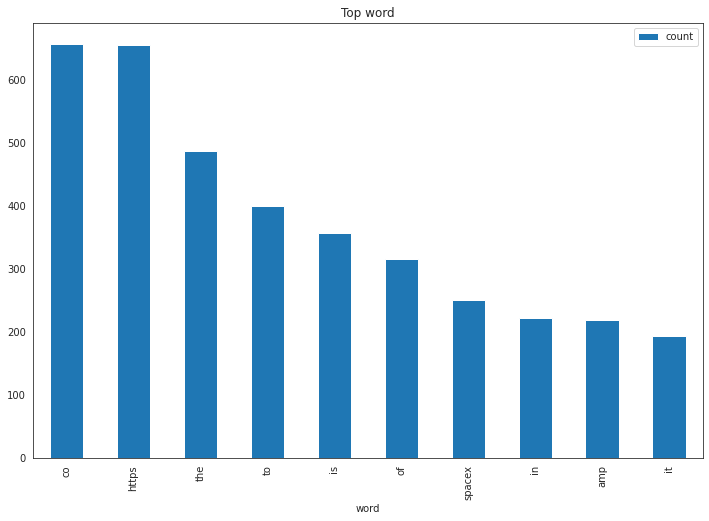

In [ ]:
##Visualizing results
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top word')

In [ ]:
# Stopwords 
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stop_words= stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in elon_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', '@', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', '@', 'kanyewest', 'https', ':']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(no_stop_tokens)

23563

In [ ]:
# Normalize the data
lower_words= [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo']


In [ ]:
# NLP english language model of spacy library
nlp= spacy.load('en_core_web_sm')

In [ ]:
# Lemmas being one of them, but mostly POS, which will follow later
doc= nlp(''. join(lower_words))
print(doc[0:40])

@kunalb11imalien@id_aa_carmackraytracingcyberpunkhdrnext-level.havetried?@joerogan@spotifygreatinterview!@gtera27dogeunderestimated@teslacncongratulationsteslachinaamazingexecutionlastyear.nownexteven!!happynewyearox!https://t.co/9wfkmyu2ojfrodounderdoge,allthoughtwouldfail,himself.https://t.co/zgxjfdzzrm@owensparks_@flcnhvy@anonyx10hahathanks:)@flcnhvy@anonyx10indeed!tweetsdefinitelyrepresentreal-worldtimeallocation.theentertainingoutcomelikely@givedirectlyjustsentjustagreeclubhouse@kanyewesthttps://t.co/3rwe9uhsts@geoffkeighley@unrealengineitsgettingrealboughtdogecoinlilx,toddlerhodler@joshmanmodehedefinitelyissues,sentencingseemsbithigh@freewalletorgthanksfixing@freewalletorgpleaseunlockaccount@astrojordy<u+0001f923><u+0001f923>thistruepowerhahahttps://t.co/fc9uhqsd7o@freewalletorganycryptowalletwontgiveprivatekeysavoidedcosts@freewalletorgyourappsucksrt@spacex:nasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemission!https://t.co/3pwt@ajtourvilleyes@blkmdl3@rat

In [ ]:
lemmas= [token.lemma_ for token in doc]
print(lemmas[0:40])

["@kunalb11i\x92malien@id_aa_carmackraytracingcyberpunkhdrnext-level.havetried?@joerogan@spotifygreatinterview!@gtera27dogeunderestimated@teslacncongratulationsteslachinaamazingexecutionlastyear.nownexteven!!happynewyearox!https://t.co/9wfkmyu2ojfrodounderdoge,allthoughtwouldfail,himself.https://t.co/zgxjfdzzrm@owensparks_@flcnhvy@anonyx10hahathanks:)@flcnhvy@anonyx10indeed!tweetsdefinitelyrepresentreal-worldtimeallocation.theentertainingoutcomelikely@givedirectlyjustsentjustagreeclubhouse@kanyewesthttps://t.co/3rwe9uhsts@geoffkeighley@unrealengineit\x92sgettingrealboughtdogecoinlilx,toddlerhodler@joshmanmodehedefinitelyissues,sentencingseemsbithigh@freewalletorgthanksfixing@freewalletorgpleaseunlockaccount@astrojordy<u+0001f923><u+0001f923>thistruepowerhahahttps://t.co/fc9uhqsd7o@freewalletorganycryptowalletwon\x92tgiveprivatekeysavoidedcosts@freewalletorgyourappsucksrt@spacex:nasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemission!https://t.co/3pwt@ajtourvilleyes@

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(lemmas)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']


wf_df1[0:10]

,word,count
0,co,653
1,amp,219
2,spacex,129
3,https,104
4,erdayastronaut,93
5,ppathole,88
6,0001f923,77
7,flcnhvy,71
8,teslaownerssv,44
9,rationaletienne,32


<AxesSubplot:title={'center':'Top Lemmas'}, xlabel='word'>

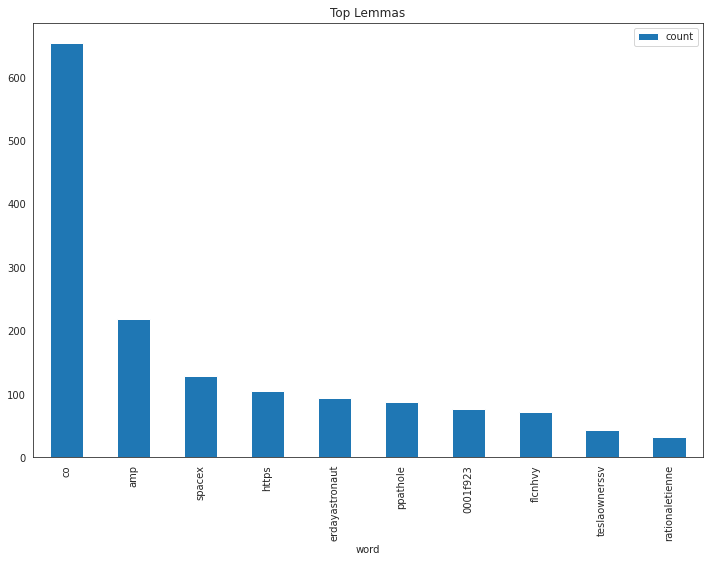

In [ ]:
##Visualizing results
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='Top Lemmas')

# Emotion Mining

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'ecstatic')

ecstatic


4

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!!
Happy New Year of the Ox!
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(40)

0      13
1       4
2       4
3      13
4       8
5       6
6      14
7      10
8       8
9     109
10     28
11     40
12     17
13      7
14     38
15     13
16      4
17     38
18      7
19      6
20     10
21      4
22      2
23     37
24     13
25     23
26      7
27      8
28     22
29      2
30     38
31     13
32     24
33     89
34      5
35     15
36    231
37     79
38     36
39     46
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
159,@harsimranbansal @heydave7 It will most likely...,11,93
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=5].head()

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
37,Short-term: solve brain/spine injuries\nLong-t...,5,79
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",9,84
45,The economy  making useful products &amp; pro...,6,15
60,https://t.co/RZtkDzAewJ @LabPadre Passed initi...,7,76


In [ ]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


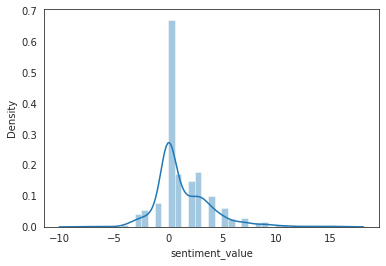

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.distplot(sent_df['sentiment_value'])
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

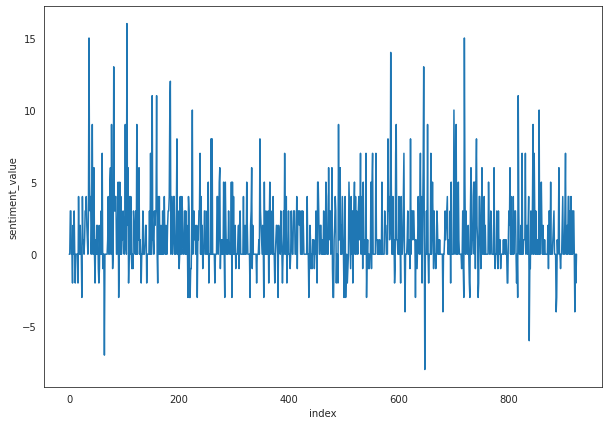

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

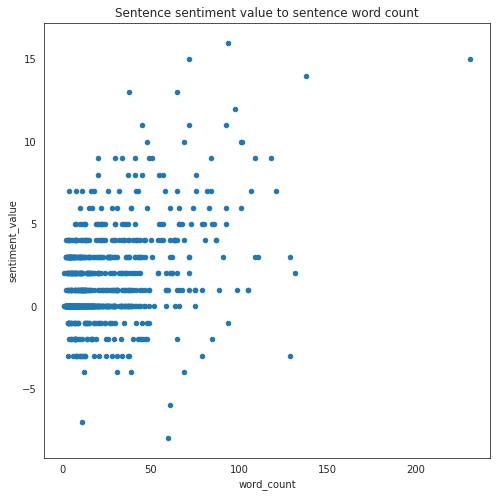

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')